# Минимакс

## Референци
- [Lichess и Stockfish](https://lichess.org/analysis)

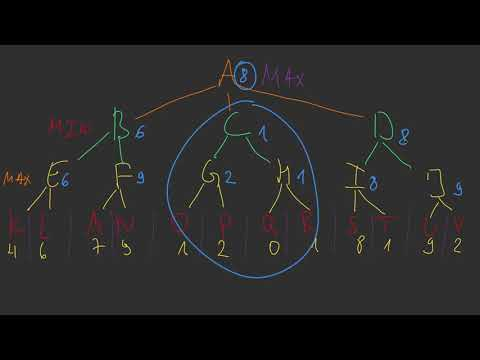

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('f_Sk-LiXk7Y')

In [2]:
from graph import Graph

In [3]:
g = Graph()
for vertex in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V']:
    g.add_vertex(vertex)
for edge in [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'G'), 
             ('C', 'H'), ('D', 'I'), ('D', 'J'), ('E', 'K'), ('E', 'L'),
             ('F', 'M'), ('F', 'N'), ('G', 'O'), ('G', 'P'), ('H', 'Q'), ('H', 'R'),
             ('I', 'S'), ('I', 'T'), ('J', 'U'), ('J', 'V')]:
    g.add_edge(edge, add_reversed=False)
leafs = {'K': 4, 'L': 6, 'M': 7, 'N': 9, 'O': 1, 'P': 2, 'Q': 0, 'R': 1, 'S': 8, 'T': 1, 'U': 9, 'V': 2}

In [4]:
plus_inf = float('inf')
minus_inf = float('-inf')

In [5]:
def other_player(player):
    return 'MIN' if player == 'MAX' else 'MAX'

In [6]:
def minimax(graph, node, player):
    """
    Implements minimax without alpha-beta pruning.
    :graph: graph
    :node: graph's node
    :player: player on turn, MIN or MAX
    """
#     Ако стигнеме да разгрануваме лист, тогаш ја враќаме вредноста на тој лист. 
#     Ова е резултат на играта или пак евалуација на моменталната состојба.
    if node in leafs:
        print(node, end=' ')
        return leafs[node]
#     Во спортивно, треба да ја пресметаме вредноста на играта за тој јазол преку истражување на сите негови деца.
#     Ако сега на ред е MAX играчот тогаш моментално најдобриот избор за него е -inf.
#     Ако сега на ред е MIN играчот тогаш моментално најдобриот избор за него е inf.
    best = plus_inf if player == 'MIN' else minus_inf
#     Итерираме низ децата на коренот `node` за да го најдеме најдобриот потег за моменталниот играч `player`.
    for child in graph.neighbours(node):
#         За секое дете го пресметуваме резултатот на играта од детето па надолу низ сите негови гранки.
        result = minimax(graph, child, other_player(player))
#         Ако на ред е MIN играчот, тогаш за него ја бараме најмалата вредност за играта која ќе ја добиеме од неговите деца.
        if player == 'MIN' and result < best:
            best = result
#         Инаку, ако на ред е MAX играчот, тогаш за него ја бараме најголема вредност за играта која ќе ја добиеме од неговите деца.
        elif player == 'MAX' and result > best:
            best = result
    return best

In [7]:
game_result = minimax(g, 'A', 'MAX')
game_result

K L M N O P Q R S T U V 

8

## Минимакс со алфа-бета поткастрување

In [8]:
def minimax_alpha_beta(graph, node, player, alpha=minus_inf, beta=plus_inf):
    """
    Implements minimax with alpha-beta pruning.
    :graph: graph
    :node: graph's node
    :player: player on turn, MIN or MAX
    :alpha: best move for MAX on the current path
    :beta: best move for MIN on the current path
    """
#     Ако стигнеме да разгрануваме лист, тогаш ја враќаме вредноста на тој лист. 
#     Ова е резултат на играта или пак евалуација на моменталната состојба.
    if node in leafs:
        print(node, end=' ')
        return leafs[node]
#     Во спортивно, треба да ја пресметаме вредноста на играта за тој јазол преку истражување на сите негови деца.
#     Ако сега на ред е MAX играчот тогаш моментално најдобриот избор за него е -inf.
#     Ако сега на ред е MIN играчот тогаш моментално најдобриот избор за него е inf.
    best = plus_inf if player == 'MIN' else minus_inf
#     Итерираме низ децата на коренот `node` за да го најдеме најдобриот потег за моменталниот играч `player`.
    for child in graph.neighbours(node):
#         За секое дете го пресметуваме резултатот на играта од детето па надолу низ сите негови гранки.
        result = minimax_alpha_beta(graph, child, other_player(player), alpha, beta)
#         Ако на ред е MIN играчот,
        if player == 'MIN':
#             Најпрво испитуваме дали најновата вредност за играта добиена од моменталното дете 
#             е помала или еднаква на alpha - моментално најдобрата вредност за MAX играчот од тука до коренот на дрвото.
#             Ако овој услов е исполнет, тогаш нема потреба да разгрануваме повеќе бидејќи колку и да е помала вредноста на играта.
#             која ќе ја пронајдеме од некое друго дете, MAX играчот ќе ја избере вредноста alpha еден степен погоре.
            if result <= alpha:
                return result
#             Во овој момент ја обновуваме вредноста на beta за да ја пратиме како аргумент на наредното дете 
#             како досега најдобра вредност за MIN играчот.
            if result < beta:
                beta = result
#             Ја бараме најмалата вредност на играта, бидејќи сега на ред е MIN, и ќе ја зачуваме како резултат во моменталниот јазол `node`.
            if result < best:
                best = result
#         Инаку, ако на ред е MAX играчот,
        elif player == 'MAX':
#             Најпрво испитуваме дали најновата вредност за играта добиена од моменталното дете 
#             е поголема или еднаква на beta - моментално најдобрата вредност за MIN играчот од тука до коренот на дрвото.
#             Ако овој услов е исполнет, тогаш нема потреба да разгрануваме повеќе бидејќи колку и да е поголема вредноста на играта
#             која ќе ја пронајдеме од некое друго дете, MIN играчот ќе ја избере вредноста beta еден степен погоре.
            if result >= beta:
                return result
#             Во овој момент ја обновуваме вредноста на alpha за да ја пратиме како аргумент на наредното дете 
#             како досега најдобра вредност за MAX играчот.
            if result > alpha:
                alpha = result
#             Ја бараме најголемата вредност на играта, бидејќи сега на ред е MAX, и ќе ја зачуваме како резултат во моменталниот јазол `node`.
            if result > best:
                best = result
    return best

In [9]:
game_result = minimax_alpha_beta(g, 'A', 'MAX')
game_result

K L M O P S T U 

8